In [592]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [593]:
def func(f,n=14,a=0,b=5):
    answer= []
    initial=[]
    tmp=a
    for i in range(n+1):
        initial.append(tmp)
        answer.append(f(tmp))
        tmp+=(b-a)/n
    return np.array(initial),np.array(answer)


In [629]:
def poly(x,y,num):
    yp=0
    for xi,yi in zip(x,y):
        P= np.prod((num-x[x != xi])/ (xi -x[x != xi]))
        yp += yi*P
    return yp

In [666]:
def coef(x, y):
    m = len(x)

    x = np.copy(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1])/(x[k:m] - x[k - 1])

    return a



In [676]:
def Eval(a, x, r):
    x.astype(float)
    n = len( a ) - 1
    temp = a[n]
    for i in range( n - 1, -1, -1 ):
        temp = temp * ( r - x[i] ) + a[i]
    return temp # return the y_value interpolation

In [677]:
f = lambda x: np.sin(x*14)

In [678]:

ini, ans =func(f, 17, -5, 5)

In [679]:
ini,ans

(array([-5.        , -4.41176471, -3.82352941, -3.23529412, -2.64705882,
        -2.05882353, -1.47058824, -0.88235294, -0.29411765,  0.29411765,
         0.88235294,  1.47058824,  2.05882353,  2.64705882,  3.23529412,
         3.82352941,  4.41176471,  5.        ]),
 array([-0.77389068,  0.87582723,  0.12203173, -0.96665277,  0.59742667,
         0.52200123, -0.98594071,  0.21181276,  0.82829313, -0.82829313,
        -0.21181276,  0.98594071, -0.52200123, -0.59742667,  0.96665277,
        -0.12203173, -0.87582723,  0.77389068]))

In [680]:
x = np.linspace(-5,5,105)
f1 = CubicSpline(ini, ans, bc_type='natural')
cf =coef(ini,ans)
print(cf)
polyno= []
polyno1= []
polyno2 =[]
for t in x:
    polyno.append(poly(ini,ans,t))
    polyno1.append(Eval(cf,ini,t))


[-7.73890682e-01  2.80452045e+00 -3.47307689e+00  1.69385864e+00
  3.19825744e-01 -9.70111405e-01  6.69754820e-01 -2.63181306e-01
  5.86229784e-02 -1.39800123e-03 -4.51375765e-03  2.01515088e-03
 -5.12235329e-04  8.13751379e-05 -4.79540639e-06 -1.58179501e-06
  6.19686529e-07 -1.23937306e-07]


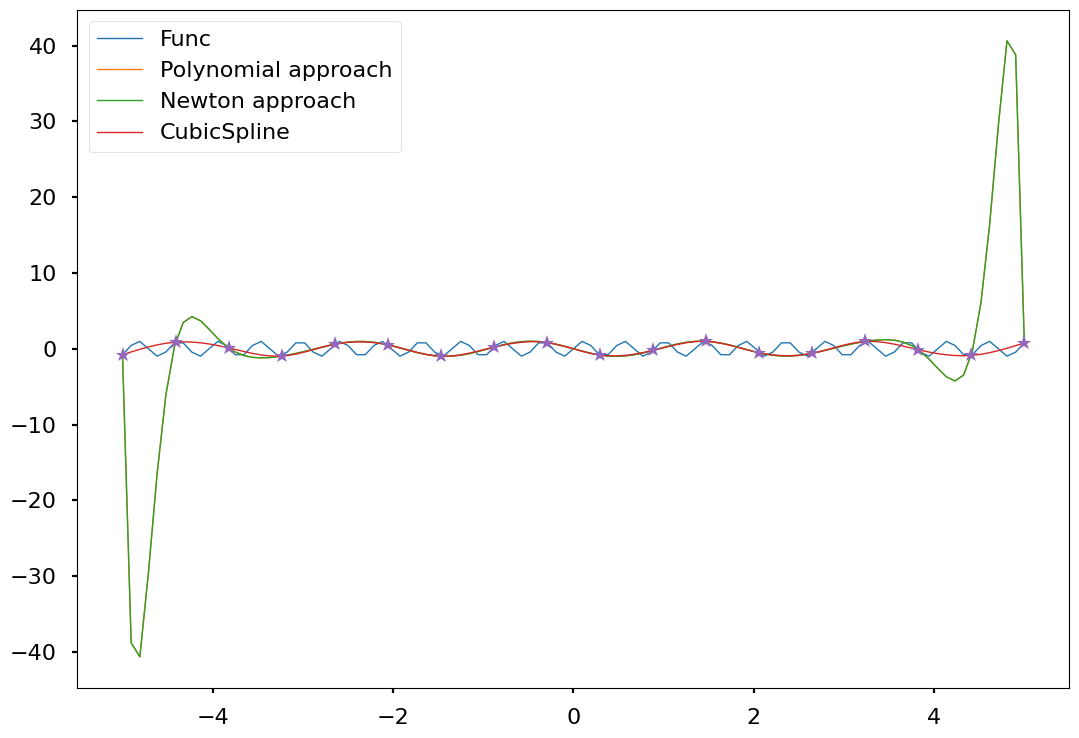

In [681]:

plt.plot(x, f(x), label="Func", linewidth=1)
plt.plot(x, polyno, label="Polynomial approach",linewidth=1)
plt.plot(x, polyno1, label="Newton approach",linewidth=1)
plt.plot(x, f1(x), label="CubicSpline",linewidth=1)
plt.plot(ini,ans,'*' )
plt.legend()